In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Reading in SO LAT MF array info:
group_type = np.loadtxt('nist_so_mf_detector_array_padinfo.csv',usecols=(0),delimiter=',',skiprows=1,unpack=True,dtype=str)
group_index = np.loadtxt('nist_so_mf_detector_array_padinfo.csv',usecols=(1),delimiter=',',skiprows=1,unpack=True,dtype=int)
group_section = np.loadtxt('nist_so_mf_detector_array_padinfo.csv',usecols=(2),delimiter=',',skiprows=1,unpack=True,dtype=str)
pad_label = np.loadtxt('nist_so_mf_detector_array_padinfo.csv',usecols=(3),delimiter=',',skiprows=1,unpack=True,dtype=str)
pad_center_x = np.loadtxt('nist_so_mf_detector_array_padinfo.csv',usecols=(4),delimiter=',',skiprows=1,unpack=True,dtype=float)
pad_center_y = np.loadtxt('nist_so_mf_detector_array_padinfo.csv',usecols=(5),delimiter=',',skiprows=1,unpack=True,dtype=float)
pixel_row = np.loadtxt('nist_so_mf_detector_array_padinfo.csv',usecols=(6),delimiter=',',skiprows=1,unpack=True,dtype=int)
pixel_column = np.loadtxt('nist_so_mf_detector_array_padinfo.csv',usecols=(7),delimiter=',',skiprows=1,unpack=True,dtype=int)
pixel_ring = np.loadtxt('nist_so_mf_detector_array_padinfo.csv',usecols=(8),delimiter=',',skiprows=1,unpack=True,dtype=int)
pixel_section = np.loadtxt('nist_so_mf_detector_array_padinfo.csv',usecols=(9),delimiter=',',skiprows=1,unpack=True,dtype=str)
pixel_pos_x = np.loadtxt('nist_so_mf_detector_array_padinfo.csv',usecols=(10),delimiter=',',skiprows=1,unpack=True,dtype=float)
pixel_pos_y = np.loadtxt('nist_so_mf_detector_array_padinfo.csv',usecols=(11),delimiter=',',skiprows=1,unpack=True,dtype=float)
raw_angle = np.loadtxt('nist_so_mf_detector_array_padinfo.csv',usecols=(12),delimiter=',',skiprows=1,unpack=True,dtype=int)
actual_angle = np.loadtxt('nist_so_mf_detector_array_padinfo.csv',usecols=(13),delimiter=',',skiprows=1,unpack=True,dtype=float)
signal_description = np.loadtxt('nist_so_mf_detector_array_padinfo.csv',usecols=(14),delimiter=',',skiprows=1,unpack=True,dtype=str)

In [7]:
#Separate rows and columns on rhombus A, B, C

rhombusA_row = []
rhombusB_row = []
rhombusC_row = []

rhombusA_col = []
rhombusB_col = []
rhombusC_col = []

i=0
while i<len(group_type):
    if group_type[i]=='RowPad':
        if group_section[i]=='A':
            rhombusA_row.append(i)
        if group_section[i]=='B':
            rhombusB_row.append(i)
        if group_section[i]=='C':
            rhombusC_row.append(i)
    if group_type[i]=='ColumnPad':
        if group_section[i]=='A':
            rhombusA_col.append(i)
        if group_section[i]=='B':
            rhombusB_col.append(i)
        if group_section[i]=='C':
            rhombusC_col.append(i)
    i+=1

# SPLAT

In [8]:
#Remove dark detectors and duplicates
A_row_x = []
A_row_y = []

A_rowpad_row = []
A_rowpad_col = []

A_rowpad_label = []

A_row_angle = []

i=0
while i<len(rhombusA_row):
    if pad_label[rhombusA_row[i]][0]=='X':
        i+=1
    if pad_label[rhombusA_row[i]][3]=='-':
        i+=1
    else:
        A_row_x.append(pixel_pos_x[rhombusA_row[i]])
        A_row_y.append(pixel_pos_y[rhombusA_row[i]])
        A_rowpad_row.append(pixel_row[rhombusA_row[i]])
        A_rowpad_col.append(pixel_column[rhombusA_row[i]])
        A_rowpad_label.append(pad_label[rhombusA_row[i]]+'90_A')
        if A_rowpad_row[-1]%2==0:
            if A_rowpad_col[-1]%2==0:
                if pad_label[rhombusA_row[i]][0]=='B':
                    A_row_angle.append(0.0)
                else:
                    A_row_angle.append(90.0)
            else:
                if pad_label[rhombusA_row[i]][0]=='B':
                    A_row_angle.append(45.0)
                else:
                    A_row_angle.append(-45.0)
        else:
            if A_rowpad_col[-1]%2!=0:
                if pad_label[rhombusA_row[i]][0]=='B':
                    A_row_angle.append(0.0)
                else:
                    A_row_angle.append(90.0)
            else:
                if pad_label[rhombusA_row[i]][0]=='B':
                    A_row_angle.append(45.0)
                else:
                    A_row_angle.append(-45.0) 
                
        i+=1

A_col_x = []
A_col_y = []

A_colpad_row = []
A_colpad_col = []

A_colpad_label = []

A_col_angle = []


i=0
while i<len(rhombusA_col):
    if pad_label[rhombusA_col[i]][0]=='X':
        i+=1
    if pad_label[rhombusA_col[i]][3]=='-':
        i+=1
    else:
        A_col_x.append(pixel_pos_x[rhombusA_col[i]])
        A_col_y.append(pixel_pos_y[rhombusA_col[i]])
        A_colpad_row.append(pixel_row[rhombusA_col[i]])
        A_colpad_col.append(pixel_column[rhombusA_col[i]])
        A_colpad_label.append(pad_label[rhombusA_col[i]]+'150_A')
        if A_colpad_row[-1]%2==0:
            if A_colpad_col[-1]%2==0:
                if pad_label[rhombusA_col[i]][0]=='R':
                    A_col_angle.append(0.0)
                else:
                    A_col_angle.append(90.0)
            else:
                if pad_label[rhombusA_col[i]][0]=='R':
                    A_col_angle.append(45.0)
                else:
                    A_col_angle.append(-45.0)
        else:
            if A_colpad_col[-1]%2!=0:
                if pad_label[rhombusA_col[i]][0]=='R':
                    A_col_angle.append(0.0)
                else:
                    A_col_angle.append(90.0)
            else:
                if pad_label[rhombusA_col[i]][0]=='R':
                    A_col_angle.append(45.0)
                else:
                    A_col_angle.append(-45.0) 
                
        i+=1

B_row_x = []
B_row_y = []

B_rowpad_row = []
B_rowpad_col = []

B_rowpad_label = []

B_row_angle = []

i=0
while i<len(rhombusB_row):
    if pad_label[rhombusB_row[i]][0]=='X':
        i+=1
    if pad_label[rhombusB_row[i]][3]=='-':
        i+=1
    else:
        B_row_x.append(pixel_pos_x[rhombusB_row[i]])
        B_row_y.append(pixel_pos_y[rhombusB_row[i]])
        B_rowpad_row.append(pixel_row[rhombusB_row[i]])
        B_rowpad_col.append(pixel_column[rhombusB_row[i]])
        B_rowpad_label.append(pad_label[rhombusB_row[i]]+'90_B')
        if B_rowpad_row[-1]%2==0:
            if B_rowpad_col[-1]%2==0:
                if pad_label[rhombusB_row[i]][0]=='B':
                    B_row_angle.append(0.0)
                else:
                    B_row_angle.append(90.0)
            else:
                if pad_label[rhombusB_row[i]][0]=='B':
                    B_row_angle.append(45.0)
                else:
                    B_row_angle.append(-45.0)
        else:
            if B_rowpad_col[-1]%2!=0:
                if pad_label[rhombusB_row[i]][0]=='B':
                    B_row_angle.append(0.0)
                else:
                    B_row_angle.append(90.0)
            else:
                if pad_label[rhombusB_row[i]][0]=='B':
                    B_row_angle.append(45.0)
                else:
                    B_row_angle.append(-45.0) 
        i+=1

B_col_x = []
B_col_y = []

B_colpad_row = []
B_colpad_col = []

B_colpad_label = []

B_col_angle = []

i=0
while i<len(rhombusB_col):
    if pad_label[rhombusB_col[i]][0]=='X':
        i+=1
    if pad_label[rhombusB_col[i]][3]=='-':
        i+=1
    else:
        B_col_x.append(pixel_pos_x[rhombusB_col[i]])
        B_col_y.append(pixel_pos_y[rhombusB_col[i]])
        B_colpad_row.append(pixel_row[rhombusB_col[i]])
        B_colpad_col.append(pixel_column[rhombusB_col[i]])
        B_colpad_label.append(pad_label[rhombusB_col[i]]+'150_B')
        if B_colpad_row[-1]%2==0:
            if B_colpad_col[-1]%2==0:
                if pad_label[rhombusB_col[i]][0]=='R':
                    B_col_angle.append(0.0)
                else:
                    B_col_angle.append(90.0)
            else:
                if pad_label[rhombusB_col[i]][0]=='R':
                    B_col_angle.append(45.0)
                else:
                    B_col_angle.append(-45.0)
        else:
            if B_colpad_col[-1]%2!=0:
                if pad_label[rhombusB_col[i]][0]=='R':
                    B_col_angle.append(0.0)
                else:
                    B_col_angle.append(90.0)
            else:
                if pad_label[rhombusB_col[i]][0]=='R':
                    B_col_angle.append(45.0)
                else:
                    B_col_angle.append(-45.0) 
        i+=1

C_row_x = []
C_row_y = []

C_rowpad_row = []
C_rowpad_col = []

C_rowpad_label = []

C_row_angle = []

i=0
while i<len(rhombusC_row):
    if pad_label[rhombusC_row[i]][0]=='X':
        i+=1
    if pad_label[rhombusC_row[i]][3]=='-':
        i+=1
    else:
        C_row_x.append(pixel_pos_x[rhombusC_row[i]])
        C_row_y.append(pixel_pos_y[rhombusC_row[i]])
        C_rowpad_row.append(pixel_row[rhombusC_row[i]])
        C_rowpad_col.append(pixel_column[rhombusC_row[i]])
        C_rowpad_label.append(pad_label[rhombusC_row[i]]+'90_C')
        if C_rowpad_row[-1]%2==0:
            if C_rowpad_col[-1]%2==0:
                if pad_label[rhombusC_row[i]][0]=='B':
                    C_row_angle.append(0.0)
                else:
                    C_row_angle.append(90.0)
            else:
                if pad_label[rhombusC_row[i]][0]=='B':
                    C_row_angle.append(45.0)
                else:
                    C_row_angle.append(-45.0)
        else:
            if C_rowpad_col[-1]%2!=0:
                if pad_label[rhombusC_row[i]][0]=='B':
                    C_row_angle.append(0.0)
                else:
                    C_row_angle.append(90.0)
            else:
                if pad_label[rhombusC_row[i]][0]=='B':
                    C_row_angle.append(45.0)
                else:
                    C_row_angle.append(-45.0) 
        i+=1

C_col_x = []
C_col_y = []

C_colpad_row = []
C_colpad_col = []

C_colpad_label = []

C_col_angle = []

i=0
while i<len(rhombusC_col):
    if pad_label[rhombusC_col[i]][0]=='X':
        i+=1
    if pad_label[rhombusC_col[i]][3]=='-':
        i+=1
    else:
        C_col_x.append(pixel_pos_x[rhombusC_col[i]])
        C_col_y.append(pixel_pos_y[rhombusC_col[i]])
        C_colpad_row.append(pixel_row[rhombusC_col[i]])
        C_colpad_col.append(pixel_column[rhombusC_col[i]])
        C_colpad_label.append(pad_label[rhombusC_col[i]]+'150_C')
        if C_colpad_row[-1]%2==0:
            if C_colpad_col[-1]%2==0:
                if pad_label[rhombusC_col[i]][0]=='R':
                    C_col_angle.append(0.0)
                else:
                    C_col_angle.append(90.0)
            else:
                if pad_label[rhombusC_col[i]][0]=='R':
                    C_col_angle.append(45.0)
                else:
                    C_col_angle.append(-45.0)
        else:
            if C_colpad_col[-1]%2!=0:
                if pad_label[rhombusC_col[i]][0]=='R':
                    C_col_angle.append(0.0)
                else:
                    C_col_angle.append(90.0)
            else:
                if pad_label[rhombusC_col[i]][0]=='R':
                    C_col_angle.append(45.0)
                else:
                    C_col_angle.append(-45.0) 
        i+=1

In [9]:
#Accounting for rhombus B and C being rotated relative to rhombus A:

i=0
while i<len(B_row_angle):
    B_row_angle[i]=B_row_angle[i]-120.
    B_col_angle[i]=B_col_angle[i]-120.
    C_row_angle[i]=C_row_angle[i]-240.
    C_col_angle[i]=C_col_angle[i]-240.
    i+=1

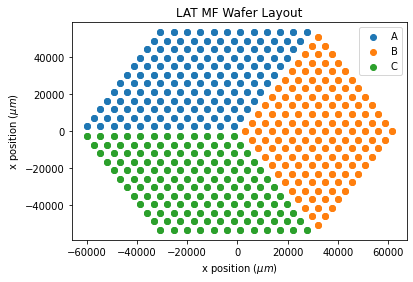

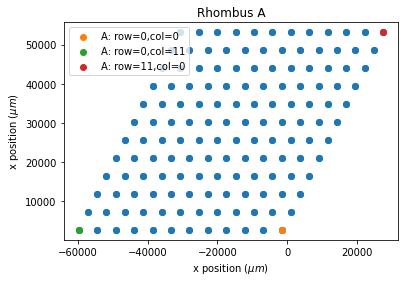

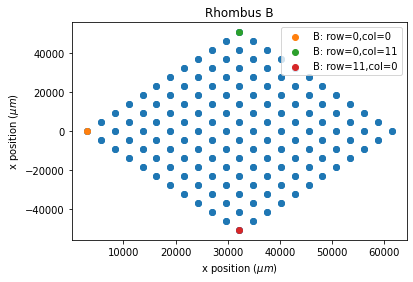

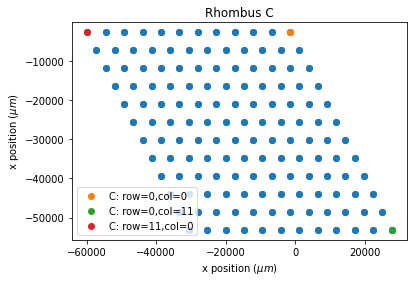

In [10]:
plt.scatter(A_row_x,A_row_y,label='A')
plt.scatter(B_row_x,B_row_y,label='B')
plt.scatter(C_row_x,C_row_y,label='C')
plt.xlabel('x position ($\mu m$)')
plt.ylabel('x position ($\mu m$)')
plt.title('LAT MF Wafer Layout')
plt.legend()
plt.show()

plt.scatter(A_row_x,A_row_y)
plt.scatter(A_row_x[0],A_row_y[0], label='A: row=0,col=0')
plt.scatter(A_row_x[22],A_row_y[22], label='A: row=0,col=11')
plt.scatter(A_row_x[264],A_row_y[264], label='A: row=11,col=0')
plt.title('Rhombus A')
plt.xlabel('x position ($\mu m$)')
plt.ylabel('x position ($\mu m$)')
plt.legend()
plt.show()

plt.scatter(B_row_x,B_row_y)
plt.scatter(B_row_x[0],B_row_y[0], label='B: row=0,col=0')
plt.scatter(B_row_x[22],B_row_y[22], label='B: row=0,col=11')
plt.scatter(B_row_x[264],B_row_y[264], label='B: row=11,col=0')
plt.title('Rhombus B')
plt.xlabel('x position ($\mu m$)')
plt.ylabel('x position ($\mu m$)')
plt.legend()
plt.show()

plt.scatter(C_row_x,C_row_y)
plt.scatter(C_row_x[0],C_row_y[0], label='C: row=0,col=0')
plt.scatter(C_row_x[22],C_row_y[22], label='C: row=0,col=11')
plt.scatter(C_row_x[264],C_row_y[264], label='C: row=11,col=0')
plt.title('Rhombus C')
plt.xlabel('x position ($\mu m$)')
plt.ylabel('x position ($\mu m$)')
plt.legend()
plt.show()


In [11]:
pixel_size = 5300. #micro m
f_ratio = 2.18
aperture = 5.*(10**3) #mm

arcsec_per_pixel = (pixel_size/(f_ratio*aperture))*206.3
deg_per_pixel = arcsec_per_pixel/3600.
deg_per_microm = deg_per_pixel/pixel_size

i=0
while i<len(A_row_x):
    A_row_x[i] = A_row_x[i]*deg_per_microm
    A_row_y[i] = A_row_y[i]*deg_per_microm
    A_col_x[i] = A_col_x[i]*deg_per_microm
    A_col_y[i] = A_col_y[i]*deg_per_microm
    
    B_row_x[i] = B_row_x[i]*deg_per_microm
    B_row_y[i] = B_row_y[i]*deg_per_microm
    B_col_x[i] = B_col_x[i]*deg_per_microm
    B_col_y[i] = B_col_y[i]*deg_per_microm
    
    C_row_x[i] = C_row_x[i]*deg_per_microm
    C_row_y[i] = C_row_y[i]*deg_per_microm
    C_col_x[i] = C_col_x[i]*deg_per_microm
    C_col_y[i] = C_col_y[i]*deg_per_microm
    
    i+=1

In [14]:
# Put info into .txt file to feed into MMT

with open('SPLAT_MF_wafer.txt','w') as f:
    i=0
    while i<len(A_rowpad_label):
        f.write(str(A_rowpad_label[i])+' '+str(A_row_x[i])+' '+str(A_row_y[i])+' '+str(A_row_angle[i])+' '+str(A_rowpad_row[i])+' '+str(A_rowpad_col[i])+'\n')
        f.write(str(A_colpad_label[i])+' '+str(A_col_x[i])+' '+str(A_col_y[i])+' '+str(A_col_angle[i])+' '+str(A_colpad_row[i])+' '+str(A_colpad_col[i])+'\n')
        
        f.write(str(B_rowpad_label[i])+' '+str(B_row_x[i])+' '+str(B_row_y[i])+' '+str(B_row_angle[i])+' '+str(B_rowpad_row[i])+' '+str(B_rowpad_col[i])+'\n')
        f.write(str(B_colpad_label[i])+' '+str(B_col_x[i])+' '+str(B_col_y[i])+' '+str(B_col_angle[i])+' '+str(B_colpad_row[i])+' '+str(B_colpad_col[i])+'\n')
        
        f.write(str(C_rowpad_label[i])+' '+str(C_row_x[i])+' '+str(C_row_y[i])+' '+str(C_row_angle[i])+' '+str(C_rowpad_row[i])+' '+str(C_rowpad_col[i])+'\n')
        f.write(str(C_colpad_label[i])+' '+str(C_col_x[i])+' '+str(C_col_y[i])+' '+str(C_col_angle[i])+' '+str(C_colpad_row[i])+' '+str(C_colpad_col[i])+'\n')

        i+=1

# CHLAT

In [15]:
#Remove dark detectors and duplicates
A_row_x = []
A_row_y = []

A_rowpad_row = []
A_rowpad_col = []

A_rowpad_label = []

A_row_angle = []

i=0
while i<len(rhombusA_row):
    if pad_label[rhombusA_row[i]][0]=='X':
        i+=1
    if pad_label[rhombusA_row[i]][3]=='-':
        i+=1
    else:
        A_row_x.append(pixel_pos_x[rhombusA_row[i]])
        A_row_y.append(pixel_pos_y[rhombusA_row[i]])
        A_rowpad_row.append(pixel_row[rhombusA_row[i]])
        A_rowpad_col.append(pixel_column[rhombusA_row[i]])
        A_rowpad_label.append(pad_label[rhombusA_row[i]]+'90_A')
        if A_rowpad_row[-1]%2==0:
            if A_rowpad_col[-1]%2==0:
                if pad_label[rhombusA_row[i]][0]=='B':
                    A_row_angle.append(0.0)
                else:
                    A_row_angle.append(90.0)
            else:
                if pad_label[rhombusA_row[i]][0]=='B':
                    A_row_angle.append(45.0)
                else:
                    A_row_angle.append(-45.0)
        else:
            if A_rowpad_col[-1]%2!=0:
                if pad_label[rhombusA_row[i]][0]=='B':
                    A_row_angle.append(0.0)
                else:
                    A_row_angle.append(90.0)
            else:
                if pad_label[rhombusA_row[i]][0]=='B':
                    A_row_angle.append(45.0)
                else:
                    A_row_angle.append(-45.0) 
                
        i+=1

A_col_x = []
A_col_y = []

A_colpad_row = []
A_colpad_col = []

A_colpad_label = []

A_col_angle = []


i=0
while i<len(rhombusA_col):
    if pad_label[rhombusA_col[i]][0]=='X':
        i+=1
    if pad_label[rhombusA_col[i]][3]=='-':
        i+=1
    else:
        A_col_x.append(pixel_pos_x[rhombusA_col[i]])
        A_col_y.append(pixel_pos_y[rhombusA_col[i]])
        A_colpad_row.append(pixel_row[rhombusA_col[i]])
        A_colpad_col.append(pixel_column[rhombusA_col[i]])
        A_colpad_label.append(pad_label[rhombusA_col[i]]+'150_A')
        if A_colpad_row[-1]%2==0:
            if A_colpad_col[-1]%2==0:
                if pad_label[rhombusA_col[i]][0]=='R':
                    A_col_angle.append(0.0)
                else:
                    A_col_angle.append(90.0)
            else:
                if pad_label[rhombusA_col[i]][0]=='R':
                    A_col_angle.append(45.0)
                else:
                    A_col_angle.append(-45.0)
        else:
            if A_colpad_col[-1]%2!=0:
                if pad_label[rhombusA_col[i]][0]=='R':
                    A_col_angle.append(0.0)
                else:
                    A_col_angle.append(90.0)
            else:
                if pad_label[rhombusA_col[i]][0]=='R':
                    A_col_angle.append(45.0)
                else:
                    A_col_angle.append(-45.0) 
                
        i+=1

B_row_x = []
B_row_y = []

B_rowpad_row = []
B_rowpad_col = []

B_rowpad_label = []

B_row_angle = []

i=0
while i<len(rhombusB_row):
    if pad_label[rhombusB_row[i]][0]=='X':
        i+=1
    if pad_label[rhombusB_row[i]][3]=='-':
        i+=1
    else:
        B_row_x.append(pixel_pos_x[rhombusB_row[i]])
        B_row_y.append(pixel_pos_y[rhombusB_row[i]])
        B_rowpad_row.append(pixel_row[rhombusB_row[i]])
        B_rowpad_col.append(pixel_column[rhombusB_row[i]])
        B_rowpad_label.append(pad_label[rhombusB_row[i]]+'90_B')
        if B_rowpad_row[-1]%2==0:
            if B_rowpad_col[-1]%2==0:
                if pad_label[rhombusB_row[i]][0]=='B':
                    B_row_angle.append(0.0)
                else:
                    B_row_angle.append(90.0)
            else:
                if pad_label[rhombusB_row[i]][0]=='B':
                    B_row_angle.append(45.0)
                else:
                    B_row_angle.append(-45.0)
        else:
            if B_rowpad_col[-1]%2!=0:
                if pad_label[rhombusB_row[i]][0]=='B':
                    B_row_angle.append(0.0)
                else:
                    B_row_angle.append(90.0)
            else:
                if pad_label[rhombusB_row[i]][0]=='B':
                    B_row_angle.append(45.0)
                else:
                    B_row_angle.append(-45.0) 
        i+=1

B_col_x = []
B_col_y = []

B_colpad_row = []
B_colpad_col = []

B_colpad_label = []

B_col_angle = []

i=0
while i<len(rhombusB_col):
    if pad_label[rhombusB_col[i]][0]=='X':
        i+=1
    if pad_label[rhombusB_col[i]][3]=='-':
        i+=1
    else:
        B_col_x.append(pixel_pos_x[rhombusB_col[i]])
        B_col_y.append(pixel_pos_y[rhombusB_col[i]])
        B_colpad_row.append(pixel_row[rhombusB_col[i]])
        B_colpad_col.append(pixel_column[rhombusB_col[i]])
        B_colpad_label.append(pad_label[rhombusB_col[i]]+'150_B')
        if B_colpad_row[-1]%2==0:
            if B_colpad_col[-1]%2==0:
                if pad_label[rhombusB_col[i]][0]=='R':
                    B_col_angle.append(0.0)
                else:
                    B_col_angle.append(90.0)
            else:
                if pad_label[rhombusB_col[i]][0]=='R':
                    B_col_angle.append(45.0)
                else:
                    B_col_angle.append(-45.0)
        else:
            if B_colpad_col[-1]%2!=0:
                if pad_label[rhombusB_col[i]][0]=='R':
                    B_col_angle.append(0.0)
                else:
                    B_col_angle.append(90.0)
            else:
                if pad_label[rhombusB_col[i]][0]=='R':
                    B_col_angle.append(45.0)
                else:
                    B_col_angle.append(-45.0) 
        i+=1

C_row_x = []
C_row_y = []

C_rowpad_row = []
C_rowpad_col = []

C_rowpad_label = []

C_row_angle = []

i=0
while i<len(rhombusC_row):
    if pad_label[rhombusC_row[i]][0]=='X':
        i+=1
    if pad_label[rhombusC_row[i]][3]=='-':
        i+=1
    else:
        C_row_x.append(pixel_pos_x[rhombusC_row[i]])
        C_row_y.append(pixel_pos_y[rhombusC_row[i]])
        C_rowpad_row.append(pixel_row[rhombusC_row[i]])
        C_rowpad_col.append(pixel_column[rhombusC_row[i]])
        C_rowpad_label.append(pad_label[rhombusC_row[i]]+'90_C')
        if C_rowpad_row[-1]%2==0:
            if C_rowpad_col[-1]%2==0:
                if pad_label[rhombusC_row[i]][0]=='B':
                    C_row_angle.append(0.0)
                else:
                    C_row_angle.append(90.0)
            else:
                if pad_label[rhombusC_row[i]][0]=='B':
                    C_row_angle.append(45.0)
                else:
                    C_row_angle.append(-45.0)
        else:
            if C_rowpad_col[-1]%2!=0:
                if pad_label[rhombusC_row[i]][0]=='B':
                    C_row_angle.append(0.0)
                else:
                    C_row_angle.append(90.0)
            else:
                if pad_label[rhombusC_row[i]][0]=='B':
                    C_row_angle.append(45.0)
                else:
                    C_row_angle.append(-45.0) 
        i+=1

C_col_x = []
C_col_y = []

C_colpad_row = []
C_colpad_col = []

C_colpad_label = []

C_col_angle = []

i=0
while i<len(rhombusC_col):
    if pad_label[rhombusC_col[i]][0]=='X':
        i+=1
    if pad_label[rhombusC_col[i]][3]=='-':
        i+=1
    else:
        C_col_x.append(pixel_pos_x[rhombusC_col[i]])
        C_col_y.append(pixel_pos_y[rhombusC_col[i]])
        C_colpad_row.append(pixel_row[rhombusC_col[i]])
        C_colpad_col.append(pixel_column[rhombusC_col[i]])
        C_colpad_label.append(pad_label[rhombusC_col[i]]+'150_C')
        if C_colpad_row[-1]%2==0:
            if C_colpad_col[-1]%2==0:
                if pad_label[rhombusC_col[i]][0]=='R':
                    C_col_angle.append(0.0)
                else:
                    C_col_angle.append(90.0)
            else:
                if pad_label[rhombusC_col[i]][0]=='R':
                    C_col_angle.append(45.0)
                else:
                    C_col_angle.append(-45.0)
        else:
            if C_colpad_col[-1]%2!=0:
                if pad_label[rhombusC_col[i]][0]=='R':
                    C_col_angle.append(0.0)
                else:
                    C_col_angle.append(90.0)
            else:
                if pad_label[rhombusC_col[i]][0]=='R':
                    C_col_angle.append(45.0)
                else:
                    C_col_angle.append(-45.0) 
        i+=1

In [16]:
#Accounting for rhombus B and C being rotated relative to rhombus A:

i=0
while i<len(B_row_angle):
    B_row_angle[i]=B_row_angle[i]-120.
    B_col_angle[i]=B_col_angle[i]-120.
    C_row_angle[i]=C_row_angle[i]-240.
    C_col_angle[i]=C_col_angle[i]-240.
    i+=1

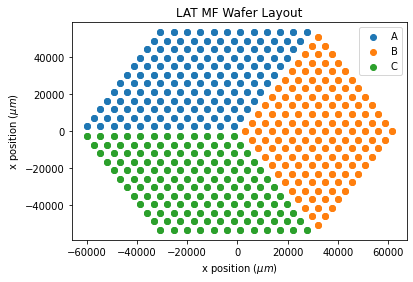

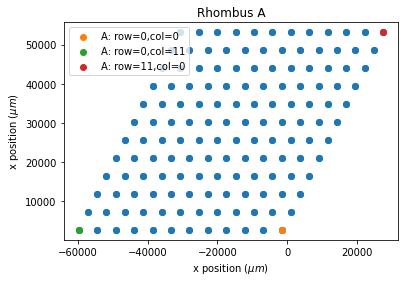

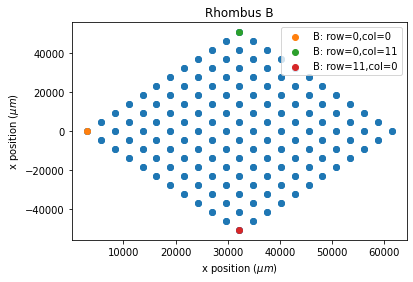

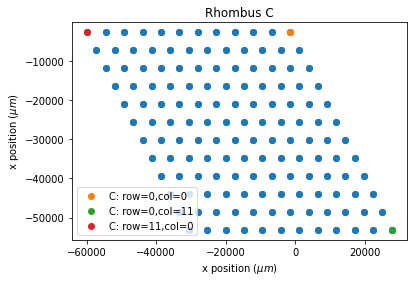

In [17]:
plt.scatter(A_row_x,A_row_y,label='A')
plt.scatter(B_row_x,B_row_y,label='B')
plt.scatter(C_row_x,C_row_y,label='C')
plt.xlabel('x position ($\mu m$)')
plt.ylabel('x position ($\mu m$)')
plt.title('LAT MF Wafer Layout')
plt.legend()
plt.show()

plt.scatter(A_row_x,A_row_y)
plt.scatter(A_row_x[0],A_row_y[0], label='A: row=0,col=0')
plt.scatter(A_row_x[22],A_row_y[22], label='A: row=0,col=11')
plt.scatter(A_row_x[264],A_row_y[264], label='A: row=11,col=0')
plt.title('Rhombus A')
plt.xlabel('x position ($\mu m$)')
plt.ylabel('x position ($\mu m$)')
plt.legend()
plt.show()

plt.scatter(B_row_x,B_row_y)
plt.scatter(B_row_x[0],B_row_y[0], label='B: row=0,col=0')
plt.scatter(B_row_x[22],B_row_y[22], label='B: row=0,col=11')
plt.scatter(B_row_x[264],B_row_y[264], label='B: row=11,col=0')
plt.title('Rhombus B')
plt.xlabel('x position ($\mu m$)')
plt.ylabel('x position ($\mu m$)')
plt.legend()
plt.show()

plt.scatter(C_row_x,C_row_y)
plt.scatter(C_row_x[0],C_row_y[0], label='C: row=0,col=0')
plt.scatter(C_row_x[22],C_row_y[22], label='C: row=0,col=11')
plt.scatter(C_row_x[264],C_row_y[264], label='C: row=11,col=0')
plt.title('Rhombus C')
plt.xlabel('x position ($\mu m$)')
plt.ylabel('x position ($\mu m$)')
plt.legend()
plt.show()


In [18]:
pixel_size = 5300. #micro m
f_ratio = 2.00
aperture = 6.*(10**3) #mm

arcsec_per_pixel = (pixel_size/(f_ratio*aperture))*206.3
deg_per_pixel = arcsec_per_pixel/3600.
deg_per_microm = deg_per_pixel/pixel_size

i=0
while i<len(A_row_x):
    A_row_x[i] = A_row_x[i]*deg_per_microm
    A_row_y[i] = A_row_y[i]*deg_per_microm
    A_col_x[i] = A_col_x[i]*deg_per_microm
    A_col_y[i] = A_col_y[i]*deg_per_microm
    
    B_row_x[i] = B_row_x[i]*deg_per_microm
    B_row_y[i] = B_row_y[i]*deg_per_microm
    B_col_x[i] = B_col_x[i]*deg_per_microm
    B_col_y[i] = B_col_y[i]*deg_per_microm
    
    C_row_x[i] = C_row_x[i]*deg_per_microm
    C_row_y[i] = C_row_y[i]*deg_per_microm
    C_col_x[i] = C_col_x[i]*deg_per_microm
    C_col_y[i] = C_col_y[i]*deg_per_microm
    
    i+=1

In [20]:
# Put info into .txt file to feed into MMT

with open('CHLAT_MF_wafer.txt','w') as f:
    i=0
    while i<len(A_rowpad_label):
        f.write(str(A_rowpad_label[i])+' '+str(A_row_x[i])+' '+str(A_row_y[i])+' '+str(A_row_angle[i])+' '+str(A_rowpad_row[i])+' '+str(A_rowpad_col[i])+'\n')
        f.write(str(A_colpad_label[i])+' '+str(A_col_x[i])+' '+str(A_col_y[i])+' '+str(A_col_angle[i])+' '+str(A_colpad_row[i])+' '+str(A_colpad_col[i])+'\n')
        
        f.write(str(B_rowpad_label[i])+' '+str(B_row_x[i])+' '+str(B_row_y[i])+' '+str(B_row_angle[i])+' '+str(B_rowpad_row[i])+' '+str(B_rowpad_col[i])+'\n')
        f.write(str(B_colpad_label[i])+' '+str(B_col_x[i])+' '+str(B_col_y[i])+' '+str(B_col_angle[i])+' '+str(B_colpad_row[i])+' '+str(B_colpad_col[i])+'\n')
        
        f.write(str(C_rowpad_label[i])+' '+str(C_row_x[i])+' '+str(C_row_y[i])+' '+str(C_row_angle[i])+' '+str(C_rowpad_row[i])+' '+str(C_rowpad_col[i])+'\n')
        f.write(str(C_colpad_label[i])+' '+str(C_col_x[i])+' '+str(C_col_y[i])+' '+str(C_col_angle[i])+' '+str(C_colpad_row[i])+' '+str(C_colpad_col[i])+'\n')

        i+=1
